# Fase 3 Análisis Exploratorio de Datos (EDA)
Distribución de Ingresos por Categoría Económica:

Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.

Calcular la diferencia promedio entre ingresos previstos y realizados por cada categoría.

Análisis Temporal:

Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.
Identificación de Discrepancias:

Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
sys.path.append("../") #Para poder importar
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:.2f}".format
# Carga el dataset de trabajo
pd.set_option("display.max_columns", None) #Ver todo
df = pd.read_csv("../datos/output/datos_2013_to_2021Fase2.csv", delimiter=",",index_col=0)

df

In [292]:
df["fecha de registro"] = pd.to_datetime(df["fecha de registro"])

In [ ]:
df.groupby("tipo de ingresos")["valor ejecutado"].sum().sort_values(ascending=False).reset_index()


In [ ]:
dinero_por_tipodeingresos = df.groupby("tipo de ingresos")["valor ejecutado"].sum().sort_values(ascending=False).reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(14,8))
sns.barplot(x="tipo de ingresos", y="valor ejecutado", data=dinero_por_tipodeingresos, palette="bright",)
plt.title("Distribución de Ingresos por Tipo de Ingresos (De 2013 a 2021)")
plt.ylabel("Valor Ejecutado (Reales Brasileños)",fontsize=12)
plt.xlabel("Tipo de Ingresos",fontsize=12)
plt.yscale("log")  # Escala logarítmica en el eje X para visualizar mejor los valores pequeños
plt.xticks(rotation=90)
plt.yticks(ticks=[1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10,1e11,1e12,1e13],
            labels=["100 R$","1.000 R$","10.000 R$","100.000 R$","1.000.000 R$","10.000.000 R$","100.000.000 R$",
                    "1.000.000.000 R$","10.000.000.000 R$","100.000.000.000 R$","1.000.000.000.000 R$","10.000.000.000.000 R$"])
plt.tight_layout()

# Top 3 Ingresos más rentables

In [ ]:
df.groupby("tipo de ingresos")["valor ejecutado"].sum().nlargest(3).reset_index()

In [ ]:
dinero_por_tipodeingresos = df.groupby("tipo de ingresos")["valor ejecutado"].sum().nlargest(3).reset_index()
# Crear un gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x="tipo de ingresos", y="valor ejecutado", data=dinero_por_tipodeingresos, palette="bright",)
plt.title("Top 3 de Ingresos más rentables")
plt.ylabel("Valor Ejecutado (Reales Brasileños)",fontsize=12)
plt.xlabel("Tipo de Ingresos",fontsize=12)
plt.yticks(ticks=[3944186330924,6261643041818,9311740376474],labels=["3.944.186.330.924 R$","6.261.643.041.818 R$","9.311.740.376.474 R$"])
plt.tight_layout()

In [ ]:
df.head(1)

# Diferencia promedio entre ingresos previstos y realizados por categoría económica

In [ ]:
df["diferencia_ingresos"] = -(df["valor previsto actualizado"] - df["valor ejecutado"])
diferencia_promedio = df.groupby("categoría económica")["diferencia_ingresos"].mean().reset_index()
diferencia_promedio.columns = ["categoría económica", "diferencia promedio"] #Invertimos debido a que si sale negativo es que hemos recaudado de promedio más
diferencia_promedio.sort_values(ascending=False,by="diferencia promedio")


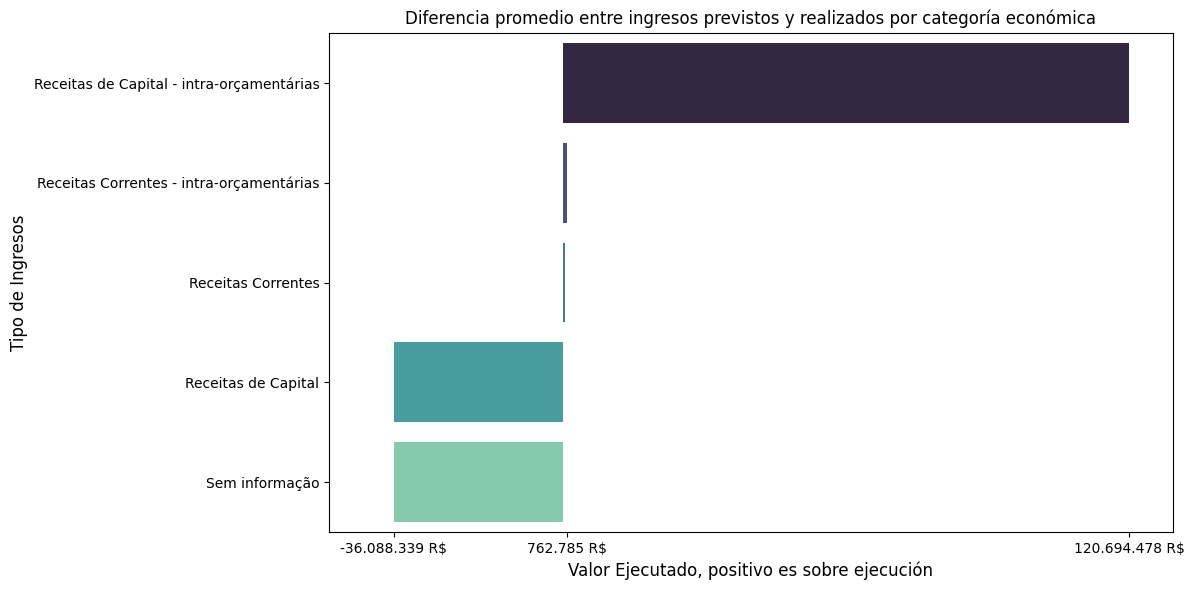

In [342]:
# Crear un gráfico de barras
# Crear un gráfico de barras sin escala logarítmica para poder mostrar los negativos
plt.figure(figsize=(12,6))
sns.barplot(y="categoría económica", x="diferencia promedio", 
            data=diferencia_promedio.sort_values(ascending=False, by="diferencia promedio"), 
            palette="mako")
plt.title("Diferencia promedio entre ingresos previstos y realizados por categoría económica")
plt.xlabel("Valor Ejecutado, positivo es sobre ejecución", fontsize=12)
plt.ylabel("Tipo de Ingresos", fontsize=12)
plt.xticks(ticks=[-36088339,762785,120694478],labels=["-36.088.339 R$","762.785 R$","120.694.478 R$"])
plt.xlim(-49900000,130000000)
plt.tight_layout()



# Conclusión
En todos estos años ha existido una sobre ejecución en 3 de ellos, llamativo sobre todo en:
- Receitas de Capital - intra-orçamentárias: Ingresos de capital intrapresupuestarios

Sin embargo tenemos una recaudación inferior en:
- Ingresos de capital
- Sin información

Cabe destacar que sin información nos proporciona datos sin categorizar, puede formar parte de cualquiera de las anteriores, dicho valor tan negativo no se puede tener en cuenta, pues no sabemos a que pertenece

# 

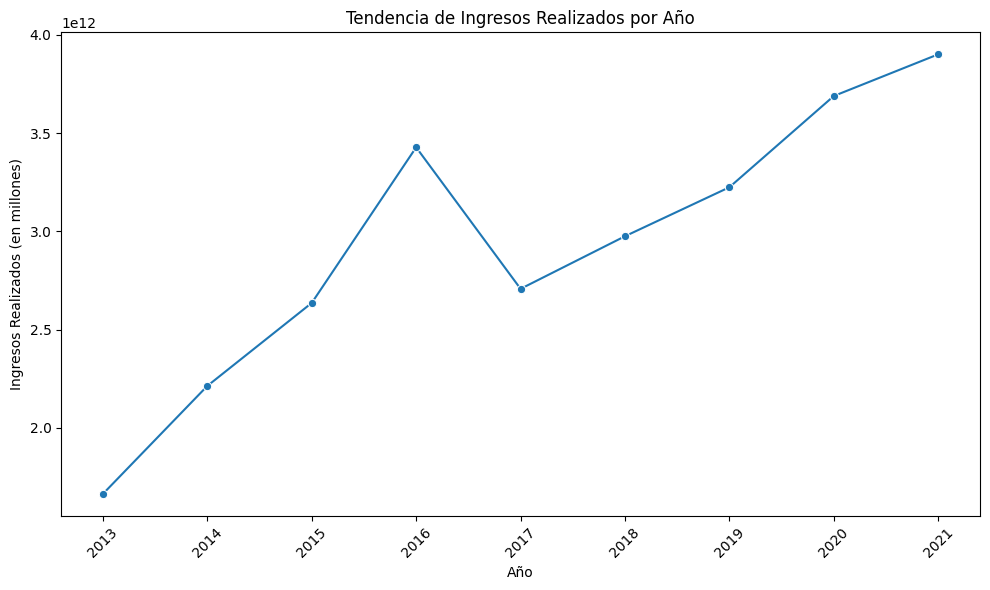

In [343]:
ingresos_mensuales = df.groupby("año fiscal")["valor ejecutado"].sum().reset_index()
# Visualizar los ingresos anuales
plt.figure(figsize=(10,6))
sns.lineplot(x="año fiscal", y="valor ejecutado", data=ingresos_mensuales, marker="o")
plt.title("Tendencia de Ingresos Realizados por Año")
plt.xlabel("Año")
plt.ylabel("Ingresos Realizados (en millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.head(1)

# Ingresos por año y categoría

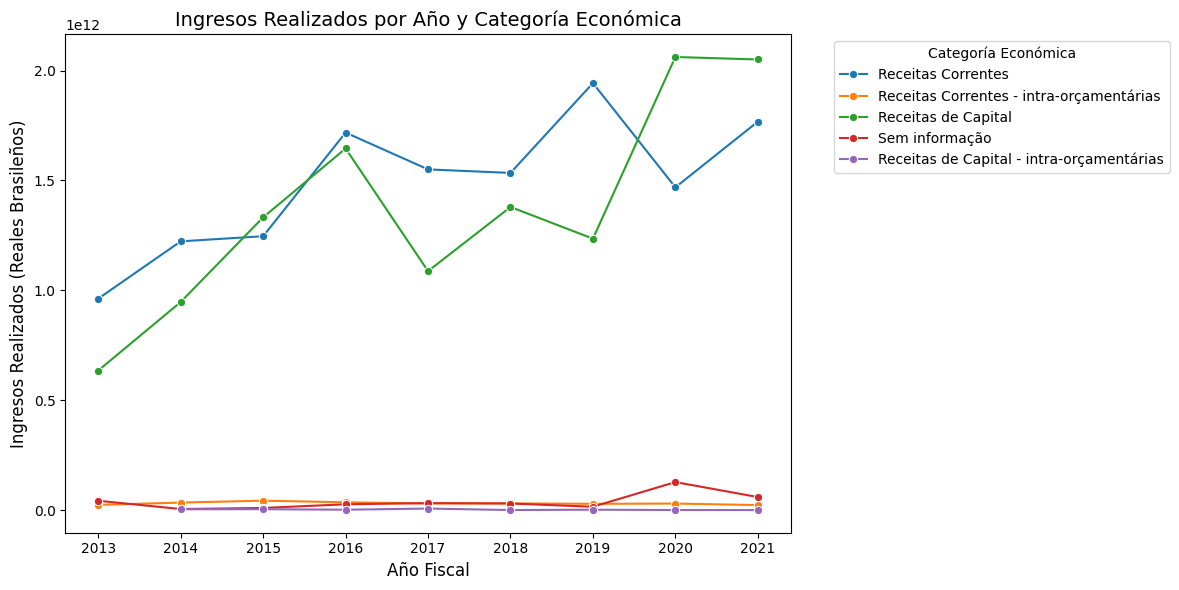

In [344]:

anuales_por_categoria = df.groupby(["año fiscal", "categoría económica"])["valor ejecutado"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x="año fiscal", y="valor ejecutado", hue="categoría económica", data=anuales_por_categoria, marker="o")
plt.title("Ingresos Realizados por Año y Categoría Económica", fontsize=14)
plt.xlabel("Año Fiscal", fontsize=12)
plt.ylabel("Ingresos Realizados (Reales Brasileños)", fontsize=12)
# Ajustar la leyenda para que no tape las lineas
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


In [263]:
c = df["categoría económica"] == "Receitas Correntes - intra-orçamentárias"
c2 = df["categoría económica"] == "Receitas de Capital - intra-orçamentárias"
c3 = df["categoría económica"] == "Sem informação"
df2 = df[c | c2 | c3]

In [ ]:

anuales_por_categoria = df2.groupby(["año fiscal", "categoría económica"])["valor ejecutado"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x="año fiscal", y="valor ejecutado", hue="categoría económica", data=anuales_por_categoria, marker="o")
plt.title("Ingresos Realizados por Año y Categoría Económica", fontsize=14)
plt.xlabel("Año Fiscal", fontsize=12)
plt.ylabel("Ingresos Realizados (Reales Brasileños)", fontsize=12)
# Ajustar la leyenda para que no tape las lineas
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()


In [322]:
df

,código del órgano superior,nombre del órgano superior,código del órgano,nombre del órgano,código de la unidad gestora,nombre de la unidad gestora,categoría económica,origen de los ingresos,tipo de ingresos,valor previsto actualizado,valor registrado,valor ejecutado,nuevo porcentaje ejecutado,fecha de registro,año fiscal,diferencia_ingresos,mes
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",0.00,0.00,1297.13,0.00,2013-12-31,2013,1297.13,12
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",0.00,0.00,26666621.42,0.00,2013-12-31,2013,26666621.42,12
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",0.00,0.00,301251.13,0.00,2013-12-31,2013,301251.13,12
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",0.00,0.00,1855.58,0.00,2013-12-31,2013,1855.58,12
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",0.00,0.00,52140.68,0.00,2013-12-31,2013,52140.68,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967908,20000,Presidência da República,60000,Gabinete da Vice-Presidência da República,110101.00,GABINETE DA VICE-PRESIDENCIA DA REPUBLICA,Receitas de Capital,Operações de Crédito,Operações de crédito - mercado interno,10247198.00,0.00,0.00,0.00,2021-04-23,2021,-10247198.00,4
967909,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001.00,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas de Capital,Operações de Crédito,Operações de crédito - mercado interno,16940891.00,0.00,0.00,0.00,2021-04-23,2021,-16940891.00,4
967910,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001.00,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,200000.00,0.00,0.00,0.00,2021-04-23,2021,-200000.00,4
967911,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001.00,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,0.00,0.00,1000000.00,0.00,2021-05-10,2021,1000000.00,5


# Ingresos realizado por mes, al año y categoría económica

In [ ]:
df['mes'] = df['fecha de registro'].dt.month
anuales_por_categoria = df2.groupby(["año fiscal", "categoría económica"])["valor ejecutado"].sum().reset_index()

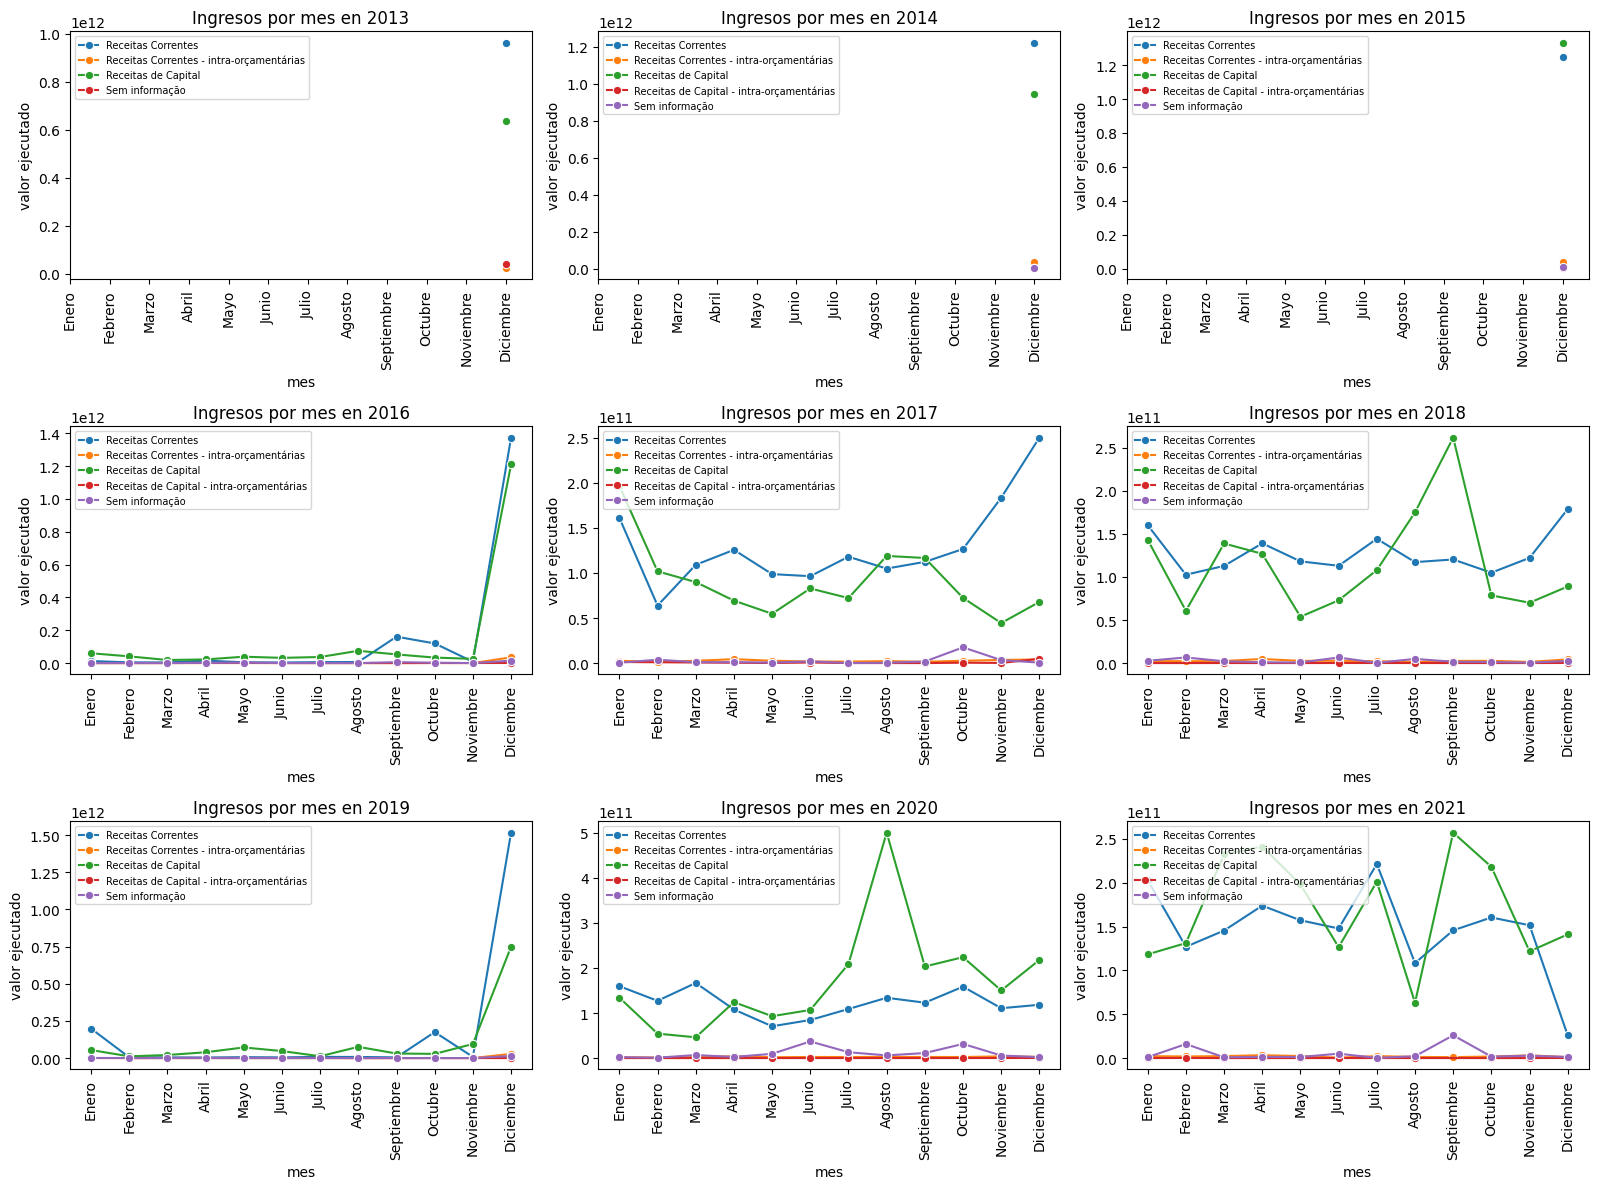

In [353]:
cond1 = df["año fiscal"] == 2013
cond2 = df["año fiscal"] == 2014
cond3 = df["año fiscal"] == 2015
cond4 = df["año fiscal"] == 2016
cond5 = df["año fiscal"] == 2017
cond6 = df["año fiscal"] == 2018
cond7 = df["año fiscal"] == 2019
cond8 = df["año fiscal"] == 2020
cond9 = df["año fiscal"] == 2021
df2013 = df[cond1]
df2014 = df[cond2]
df2015 = df[cond3]
df2016 = df[cond4]
df2017 = df[cond5]
df2018 = df[cond6]
df2019 = df[cond7]
df2020 = df[cond8]
df2021 = df[cond9]

año2013 = df2013.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()
año2014 = df2014.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()
año2015 = df2015.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()
año2016 = df2016.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()
año2017 = df2017.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()
año2018 = df2018.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()
año2019 = df2019.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()
año2020 = df2020.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()
año2021 = df2021.groupby(["categoría económica","mes"])["valor ejecutado"].sum().reset_index()

fig, axes = plt.subplots(3, 3, figsize=(16, 12)) 
axes = axes.flatten()
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2013, marker="o",ax=axes[0])
axes[0].set_title("Ingresos por mes en 2013")
axes[0].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[0].legend(fontsize=7, loc='upper left')
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2014, marker="o",ax=axes[1])
axes[1].set_title("Ingresos por mes en 2014")
axes[1].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[1].legend(fontsize=7, loc='upper left')
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2015, marker="o",ax=axes[2])
axes[2].set_title("Ingresos por mes en 2015")
axes[2].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[2].legend(fontsize=7, loc='upper left')
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2016, marker="o",ax=axes[3])
axes[3].set_title("Ingresos por mes en 2016")
axes[3].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[3].legend(fontsize=7, loc='upper left')
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2017, marker="o",ax=axes[4])
axes[4].set_title("Ingresos por mes en 2017")
axes[4].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[4].legend(fontsize=7, loc='upper left')
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2018, marker="o",ax=axes[5])
axes[5].set_title("Ingresos por mes en 2018")
axes[5].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[5].legend(fontsize=7, loc='upper left')
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2019, marker="o",ax=axes[6])
axes[6].set_title("Ingresos por mes en 2019")
axes[6].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[6].legend(fontsize=7, loc='upper left')
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2020, marker="o",ax=axes[7])
axes[7].set_title("Ingresos por mes en 2020")
axes[7].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[7].legend(fontsize=7, loc='upper left')
sns.lineplot(x="mes", y="valor ejecutado", hue="categoría económica", data=año2021, marker="o",ax=axes[8])
axes[8].set_title("Ingresos por mes en 2021")
axes[8].set_xticks(rotation= 90,ticks=[1,2,3,4,5,6,7,8,9,10,11,12],labels=["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
axes[8].legend(fontsize=7, loc='upper left')
plt.tight_layout()

In [324]:
df2021

,código del órgano superior,nombre del órgano superior,código del órgano,nombre del órgano,código de la unidad gestora,nombre de la unidad gestora,categoría económica,origen de los ingresos,tipo de ingresos,valor previsto actualizado,valor registrado,valor ejecutado,nuevo porcentaje ejecutado,fecha de registro,año fiscal,diferencia_ingresos,mes
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",0.00,0.00,1297.13,0.00,2013-12-31,2013,1297.13,12
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",0.00,0.00,26666621.42,0.00,2013-12-31,2013,26666621.42,12
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",0.00,0.00,301251.13,0.00,2013-12-31,2013,301251.13,12
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",0.00,0.00,1855.58,0.00,2013-12-31,2013,1855.58,12
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060.00,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",0.00,0.00,52140.68,0.00,2013-12-31,2013,52140.68,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,20000,Presidência da República,20101,Presidência da República,110005.00,SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",0.00,0.00,8.34,0.00,2013-12-31,2013,8.34,12
4396,20000,Presidência da República,64000,Secretaria de Direitos Humanos,200016.00,SECRETARIA DE DIREITOS HUMANOS/PR,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",0.00,0.00,0.28,0.00,2013-12-31,2013,0.28,12
4397,20000,Presidência da República,20101,Presidência da República,110005.00,SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR,Receitas Correntes,Receita Patrimonial,Exploração do patrimônio imobiliário do Estad,0.00,0.00,61593.03,0.00,2013-12-31,2013,61593.03,12
4398,20000,Presidência da República,20116,Fundo de Imprensa Nacional,110245.00,FUNDO DE IMPRENSA NACIONAL/EXEC.ORC.FINANC.,Receitas Correntes - intra-orçamentárias,Receita Industrial,Receitas da indústria de transformação,120839273.00,0.00,161286016.04,133.47,2013-12-31,2013,40446743.04,12


In [ ]:
plt.title("Ingresos Realizados por Año y Categoría Económica", fontsize=14)
plt.xlabel("Año Fiscal", fontsize=12)
plt.ylabel("Ingresos Realizados (Reales Brasileños)", fontsize=12)
# Ajustar la leyenda para que no tape las lineas
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Ingresos realizados por año y categoría económica


In [ ]:
df["diferencia_ingresos"] = df["valor ejecutado"] - (df["valor previsto actualizado"] + df["valor registrado"])
c = df["categoría económica"] == "Receitas Correntes - intra-orçamentárias"
c2 = df["categoría económica"] == "Receitas de Capital - intra-orçamentárias"
c3 = df["categoría económica"] == "Sem informação"
c4 = df["categoría económica"] == "Receitas Correntes"
c5 = df["categoría económica"] == "Receitas de Capital"
df1 = df[c]
df2 = df[c2]
df3 = df[c3]
df4 = df[c4]
df5 = df[c5]

df4["diferencia_ingresos"] = df4["valor ejecutado"] - (df4["valor previsto actualizado"] + df4["valor registrado"])
facturascorrientes = df4.groupby(["año fiscal", "mes"])["diferencia_ingresos"].sum().reset_index()
fig, axes = plt.subplots(3, 2, figsize=(12, 12)) 
#sns.lineplot(x="año fiscal", y="nuevo porcentaje ejecutado", data=facturascorrientes, marker="o",ax=axes[0])
facturascorrientes


In [ ]:
anuales_por_categoria = df.groupby(["año fiscal", "categoría económica"])["nuevo porcentaje ejecutado"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x="año fiscal", y="nuevo porcentaje ejecutado", hue="categoría económica", data=anuales_por_categoria, marker="o")
plt.title("Ingresos Realizados por Año y Categoría Económica", fontsize=14)
plt.xlabel("Año Fiscal", fontsize=12)
plt.ylabel("Ingresos Realizados (Reales Brasileños)", fontsize=12)
# Ajustar la leyenda para que no tape las lineas
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

In [ ]:
anuales_por_categoria = df2.groupby(["año fiscal", "categoría económica"])["nuevo porcentaje ejecutado"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x="año fiscal", y="nuevo porcentaje ejecutado", hue="categoría económica", data=anuales_por_categoria, marker="o")
plt.title("Ingresos Realizados por Año y Categoría Económica", fontsize=14)
plt.xlabel("Año Fiscal", fontsize=12)
plt.ylabel("Ingresos Realizados (Reales Brasileños)", fontsize=12)
# Ajustar la leyenda para que no tape las lineas
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

In [242]:
c = df["categoría económica"] == "Receitas Correntes - intra-orçamentárias"
c2 = df["categoría económica"] == "Receitas de Capital - intra-orçamentárias"
c3 = df["categoría económica"] == "Sem informação"
df3 = df[c | c2 ]

In [ ]:
anuales_por_categoria = df3.groupby(["año fiscal", "categoría económica"])["nuevo porcentaje ejecutado"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x="año fiscal", y="nuevo porcentaje ejecutado", hue="categoría económica", data=anuales_por_categoria, marker="o")
plt.title("Ingresos Realizados por Año y Categoría Económica", fontsize=14)
plt.xlabel("Año Fiscal", fontsize=12)
plt.ylabel("Ingresos Realizados (Reales Brasileños)", fontsize=12)
# Ajustar la leyenda para que no tape las lineas
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

In [ ]:
df['diferencia_ingresos'] = df['valor previsto actualizado'] - df['valor ejecutado']
diferencia_por_categoria = df.groupby(['año fiscal', 'categoría económica'])['diferencia_ingresos'].sum().reset_index()
categorias = diferencia_por_categoria['categoría económica'].unique()

